In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro,normaltest,kstest,zscore,skew

import warnings
from warnings import filterwarnings

# Probelem Statements

In [3]:
# To predict customer score by using given feture

# Data Gathering

In [4]:
df=pd.read_csv("Customers.csv")
df

,CustomerID,Genre,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Genre           200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.describe(include="all")

,CustomerID,Genre,Age,Annual_Income,Spending_Score
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


# Feture Engineering

In [8]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

In [9]:
df["CustomerID"].value_counts()

CustomerID
1      1
138    1
128    1
129    1
130    1
      ..
70     1
71     1
72     1
73     1
200    1
Name: count, Length: 200, dtype: int64

<Axes: xlabel='CustomerID', ylabel='Density'>

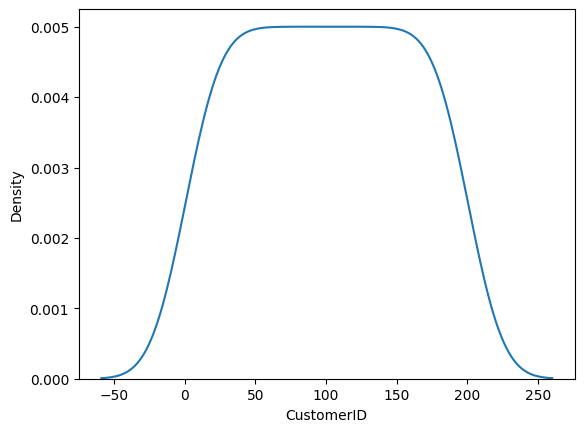

In [10]:
sns.kdeplot(df["CustomerID"])

<Axes: xlabel='CustomerID'>

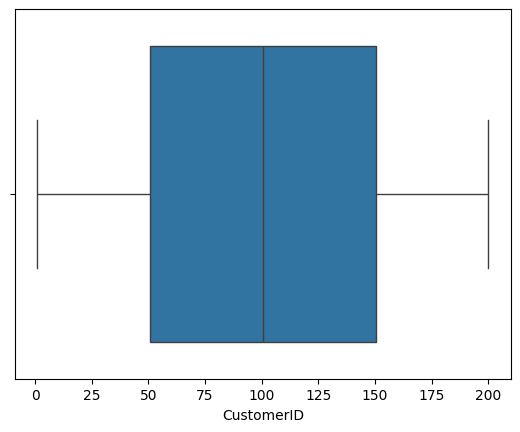

In [11]:
sns.boxplot(x=df["CustomerID"])

In [12]:
df["Genre"].value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

In [13]:
df["Genre"].replace({"Female":0,"Male":1},inplace=True)

In [14]:
df

,CustomerID,Genre,Age,Annual_Income,Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [15]:
df["Genre"].value_counts()

Genre
0    112
1     88
Name: count, dtype: int64

In [16]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

In [17]:
df["Age"].value_counts()

Age
32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Density'>

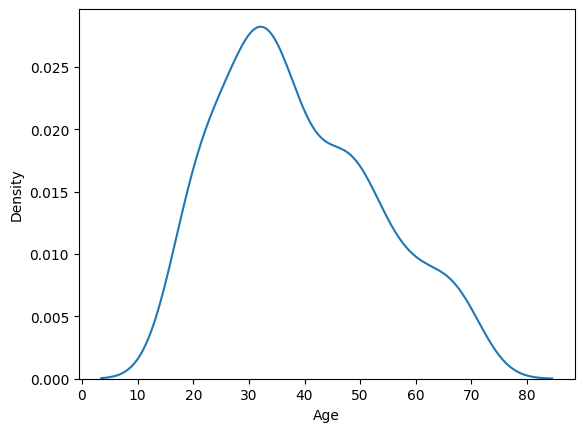

In [18]:
sns.kdeplot(df["Age"])

<Axes: xlabel='Age'>

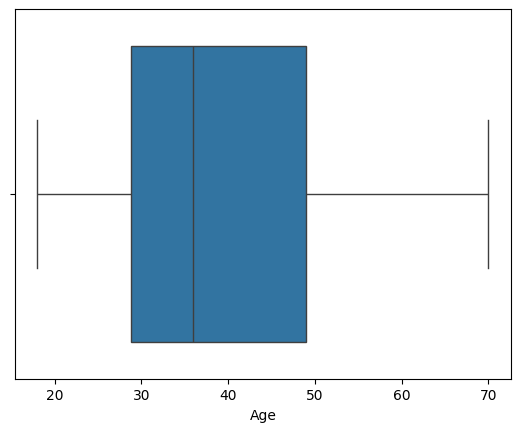

In [19]:
sns.boxplot(x=df["Age"])

In [20]:
df["Annual_Income"].value_counts()

Annual_Income
54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: count, Length: 64, dtype: int64

<Axes: xlabel='Annual_Income', ylabel='Density'>

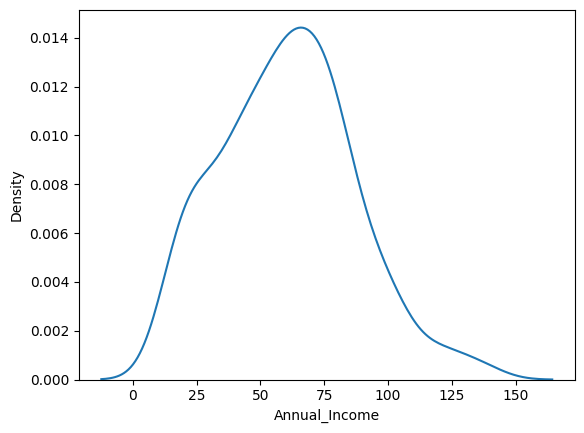

In [21]:
sns.kdeplot(df["Annual_Income"])

<Axes: xlabel='Annual_Income'>

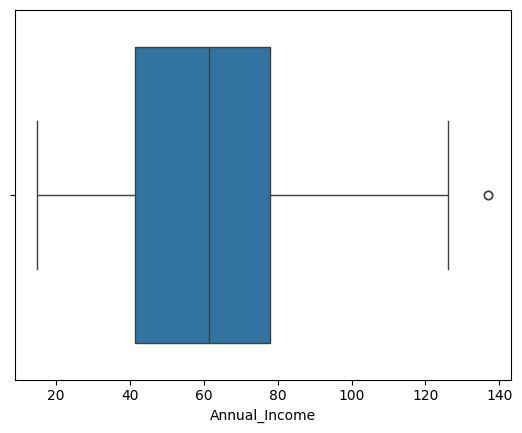

In [22]:
sns.boxplot(x=df["Annual_Income"])

In [23]:
df["Spending_Score"]

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending_Score, Length: 200, dtype: int64

In [24]:
df

,CustomerID,Genre,Age,Annual_Income,Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


# Feature Selection

In [25]:
x=df.drop("Spending_Score",axis=1)
y=df["Spending_Score"]

In [26]:
x

,CustomerID,Genre,Age,Annual_Income
0,1,1,19,15
1,2,1,21,15
2,3,0,20,16
3,4,0,23,16
4,5,0,31,17
...,...,...,...,...
195,196,0,35,120
196,197,0,45,126
197,198,1,32,126
198,199,1,32,137


In [27]:
y

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending_Score, Length: 200, dtype: int64

Linearity

In [28]:
df.corr()

,CustomerID,Genre,Age,Annual_Income,Spending_Score
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Genre,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual_Income,0.977548,0.056410,-0.012398,1.000000,0.009903
Spending_Score,0.013835,-0.058109,-0.327227,0.009903,1.000000


<Axes: >

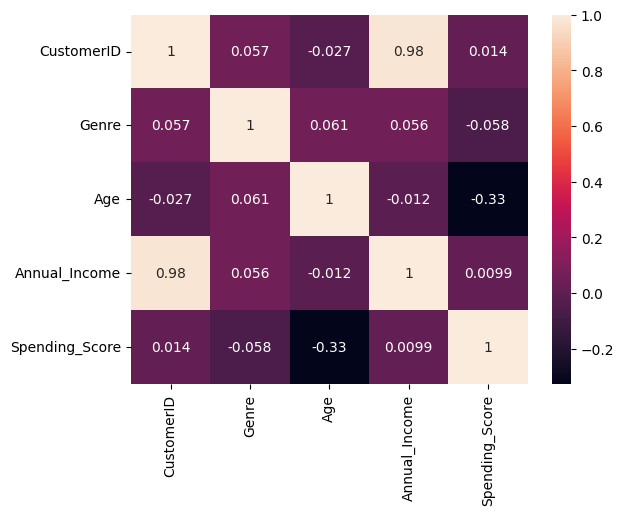

In [29]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

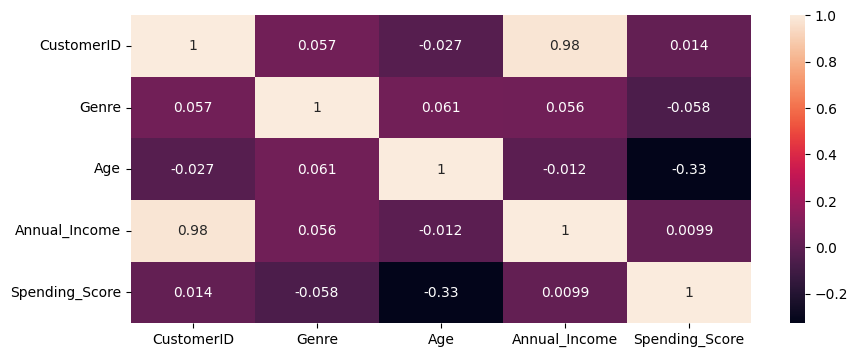

In [30]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(),annot=True)

<Axes: >

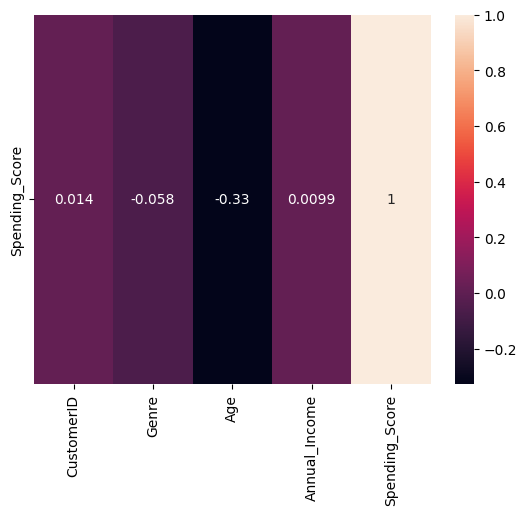

In [31]:
sns.heatmap(df.corr().tail(1),annot=True)

<Axes: >

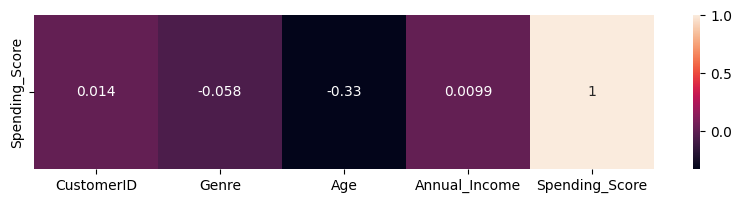

In [32]:
plt.figure(figsize=(10,2))
sns.heatmap(df.corr().tail(1),annot=True)

$$
No Multicolinarity
$$

In [33]:
vif_list=[]

for i in range(x.shape[1]):
    vif=variance_inflation_factor(x.to_numpy(),i)
    print(f"VIF value is {x.columns[i]}",vif)
    vif_list.append(vif)

VIF value is CustomerID 67.28020784664572
VIF value is Genre 1.7639074343135557
VIF value is Age 5.814487361937159
VIF value is Annual_Income 90.07242762967225


In [34]:
vif_list=[]

for i in range(x.shape[1]):
    vif=variance_inflation_factor(x.to_numpy(),i)
    print(f" VIF value is {x.columns[i]}",vif)
    vif_list.append(vif)

 VIF value is CustomerID 67.28020784664572
 VIF value is Genre 1.7639074343135557
 VIF value is Age 5.814487361937159
 VIF value is Annual_Income 90.07242762967225


In [35]:
s1=pd.Series(vif_list,index=x.columns)
s1

CustomerID       67.280208
Genre             1.763907
Age               5.814487
Annual_Income    90.072428
dtype: float64

<Axes: >

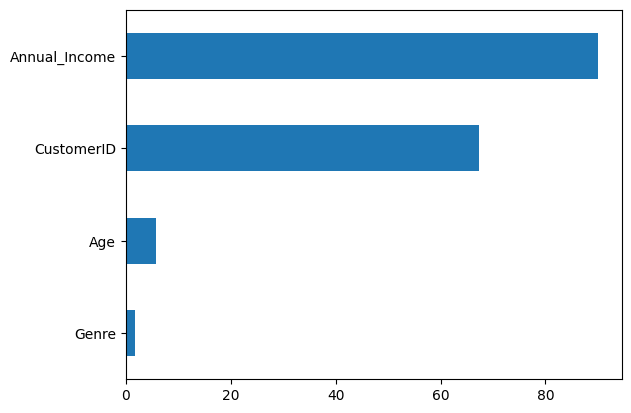

In [36]:
s1.sort_values().plot(kind="barh")

$$
Model Training
$$

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [38]:
x_train

,CustomerID,Genre,Age,Annual_Income
159,160,0,30,78
62,63,0,67,47
166,167,1,42,86
45,46,0,24,39
23,24,1,31,25
...,...,...,...,...
73,74,0,60,50
144,145,1,25,77
118,119,0,51,67
189,190,0,36,103


In [39]:
y_train

159    73
62     52
166    20
45     65
23     73
       ..
73     56
144    12
118    43
189    85
99     49
Name: Spending_Score, Length: 160, dtype: int64

In [40]:
x_test

,CustomerID,Genre,Age,Annual_Income
119,120,0,50,67
77,78,1,40,54
148,149,0,34,78
149,150,1,34,78
154,155,0,47,78
151,152,1,39,78
122,123,0,40,69
6,7,0,35,18
28,29,0,40,29
71,72,0,47,49


In [41]:
y_test

119    57
77     48
148    22
149    90
154    16
151    88
122    58
6       6
28     31
71     42
188    17
34     14
21     73
40     35
55     41
104    56
3      77
39     75
117    59
134     5
180    32
26     32
54     45
165    75
53     60
93     40
174    13
17     66
56     50
84     57
25     82
156     1
42     36
141    93
50     52
51     60
195    79
116    43
142    40
24     14
Name: Spending_Score, dtype: int64

$$
Model Evalutaion
$$

In [42]:
Customer_model=LinearRegression()
Customer_model

LinearRegression()

In [43]:
Customer_model.fit(x_train,y_train)

LinearRegression()

In [44]:
# Training Data Evaluation

y_pred_train=Customer_model.predict(x_train)

mse=mean_squared_error(y_train,y_pred_train)
print("MSE >>",mse)

rmse=np.sqrt(mse)
print("RMSE >>",rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print("MAE >>",mae)

r2=r2_score(y_train,y_pred_train)
print("R2 >>",r2)

MSE >> 589.0515662577185
RMSE >> 24.270384551088565
MAE >> 20.485012218457022
R2 >> 0.12198160457942875


In [45]:
y_pred_test=Customer_model.predict(x_test)

mse=mean_squared_error(y_test,y_pred_test)
print("MSE >>",mse)

rmse=np.sqrt(mse)
print("RMSE >>",rmse)

mae=mean_absolute_error(y_test,y_pred_test)
print("MAE >>",mae)

r2=r2_score(y_test,y_pred_test)
print("R2 >>",r2)

MSE >> 622.9859072716876
RMSE >> 24.959685640482085
MAE >> 20.07575883515018
R2 >> -0.0027942169363179836


In [46]:
residual=y_train-y_pred_train
residual

159    13.085777
62     15.219349
166   -27.002853
45      3.989785
23     21.363462
         ...    
73     14.953602
144   -44.339005
118    -3.876710
189    29.453766
99     -9.325934
Name: Spending_Score, Length: 160, dtype: float64

<Axes: xlabel='Spending_Score', ylabel='Density'>

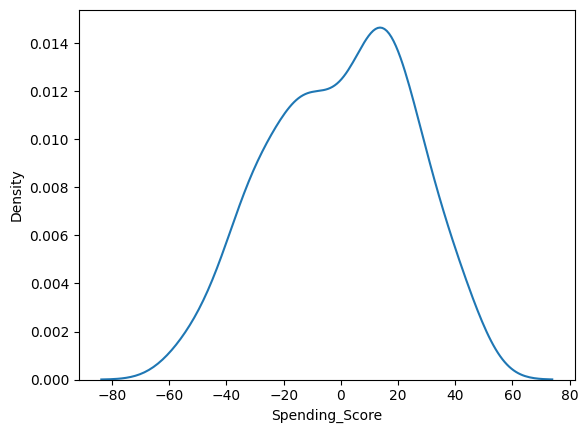

In [47]:
sns.kdeplot(residual)

<Axes: xlabel='Spending_Score', ylabel='Density'>

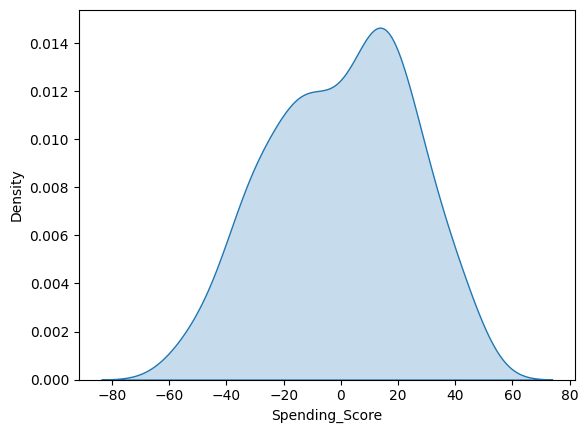

In [48]:
sns.kdeplot(residual,fill=True)

In [49]:
skew(residual)

-0.19465959355359047

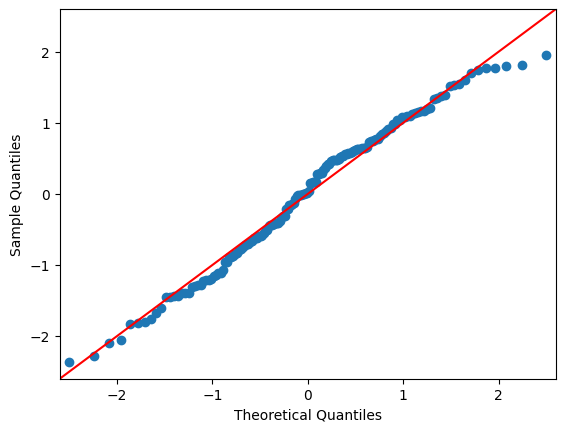

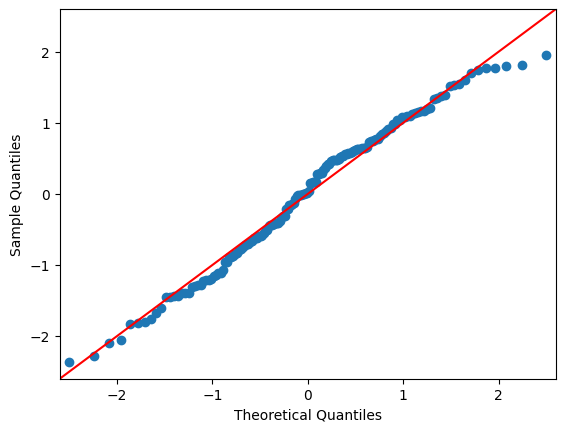

In [50]:
sm.qqplot(residual,line="45",fit=True)

$$
Lasso
$$

In [51]:
lasso_model=Lasso()
lasso_model

Lasso()

In [52]:
lasso_model.fit(x_train,y_train)

Lasso()

In [53]:
lasso_model = Lasso()

hyperparameters = {"alpha" :np.arange(0.01,5,0.01) }

gscv_lasso_model = GridSearchCV(lasso_model,hyperparameters,cv = 5)
gscv_lasso_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0....
       4.19, 4.2 , 4.21, 4.22, 4.23, 4.24, 4.25, 4.26, 4.27, 4.28, 4.29,
       4.3 , 4.31, 4.32, 4.33, 4.34, 4.35, 4.36, 4.37, 4.38, 4.39, 4.4 ,
       4.41, 4.42, 4.43, 4.44, 4.45, 4.46, 4.47, 4.48, 4.49, 4.5 , 4.51,
       4.52, 4.53, 4.54, 4.55, 4.56, 4.57, 4.58, 4.59, 4.6 , 4.61, 4.62,
       4.63, 4.64, 4.65, 4.66, 4.67, 4.68, 4.69, 4.7 , 4.71, 4.72, 4.73,
       4.74, 4.75, 4.76, 4.77, 4.78, 4.79, 4.8 , 4.81, 4.82, 4.83, 4.84,
       4.85, 4.86, 4.87, 4.88, 4.89, 4.9 , 4.91, 4.92, 4.93, 4.94, 4.95,
       4.96, 4.97, 4.98, 4.99])})

In [54]:
gscv_lasso_model.best_estimator_

Lasso(alpha=4.99)

In [55]:
lasso_model=Lasso(alpha=4.99)
lasso_model.fit(x_train,y_train)
y_pred_train=lasso_model.predict(x_train)

mse=mean_squared_error(y_train,y_pred_train)
print("MSE Lasso >>",mse)

rmse=np.sqrt(mse)
print("RMSE Lasso >>",rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print("MAE Lasso >>",mae)

r2=r2_score(y_train,y_pred_train)
print("R2 Lasso >>",r2)

MSE Lasso >> 597.3915793622696
RMSE Lasso >> 24.441595270404704
MAE Lasso >> 20.5408210367149
R2 Lasso >> 0.1095502906787359


In [56]:
y_pred_test=lasso_model.predict(x_test)

mse=mean_squared_error(y_test,y_pred_test)
print("MSE Lasso >>",mse)

rmse=np.sqrt(mse)
print("RMSE Lasso >>",rmse)

mae=mean_absolute_error(y_test,y_pred_test)
print("MAE Lasso >>",mae)

r2=r2_score(y_test,y_pred_test)
print("R2 Lasso >>",r2)

MSE Lasso >> 575.617735077503
RMSE Lasso >> 23.992034825697942
MAE Lasso >> 19.325531866137492
R2 Lasso >> 0.07345233790341577


$$
Ridge Regression
$$

In [57]:
ridge_model=Ridge()
ridge_model

Ridge()

In [58]:
ridge_model.fit(x_train,y_train)

Ridge()

In [59]:
ridge_model.score(x_train,y_train
                  )

0.12197431214831811

In [60]:
ridge_model.coef_

array([ 0.05674781, -5.51858363, -0.5666187 , -0.10716074])

In [61]:
ridge_model.intercept_

76.1264879496048

In [62]:
ridge_model=Ridge()

hyperparameters={"alpha":np.arange(0.01,0.5,0.01)}

gscv_ridge_model=GridSearchCV(ridge_model,hyperparameters,cv=5)
gscv_ridge_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49])})

In [63]:
gscv_ridge_model.best_estimator_

Ridge(alpha=0.49)

In [64]:
ridge_model=Ridge(alpha=0.49)
ridge_model.fit(x_train,y_train)
y_pred_train=ridge_model.predict(x_train)

mse=mean_squared_error(y_train,y_pred_train)
print("MSE Lasso >>",mse)

rmse=np.sqrt(mse)
print("RMSE Lasso >>",rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print("MAE Lasso >>",mae)

r2=r2_score(y_train,y_pred_train)
print("R2 Lasso >>",r2)


MSE Lasso >> 589.0527715614421
RMSE Lasso >> 24.2704093818263
MAE Lasso >> 20.48385147450899
R2 Lasso >> 0.12197980799844665


In [65]:
y_pred_test=ridge_model.predict(x_test)

mse=mean_squared_error(y_test,y_pred_test)
print("MSE Lasso >>",mse)

rmse=np.sqrt(mse)
print("RMSE Lasso >>",rmse)

mae=mean_absolute_error(y_test,y_pred_test)
print("MAE Lasso >>",mae)

r2=r2_score(y_test,y_pred_test)
print("R2 Lasso >>",r2)

MSE Lasso >> 622.3422621903237
RMSE Lasso >> 24.946788614776125
MAE Lasso >> 20.064676202000406
R2 Lasso >> -0.0017581685156116134


In [66]:
result=pd.DataFrame({"Linear_Reg":[589.05,24.27,20.48,0.12],
                     "Lasso_Reg":[597.39,24.44,20.54,0.10],
                     "Ridge_Reg":[589.05,24.27,20.48,0.12]},index=["MSE","RMSE","MAE","R2"])
result

,Linear_Reg,Lasso_Reg,Ridge_Reg
MSE,589.05,597.39,589.05
RMSE,24.27,24.44,24.27
MAE,20.48,20.54,20.48
R2,0.12,0.10,0.12


In [67]:
import pickle

In [68]:
with open("customer_data11.pkl","wb")as f:
    pickle.dump(Customer_model,f)

In [69]:
data={"Genre":{"Female":0,"Male":1},
      "columns":list(x.columns)}
data

{'Genre': {'Female': 0, 'Male': 1},
 'columns': ['CustomerID', 'Genre', 'Age', 'Annual_Income']}

In [70]:
import json

In [71]:
with open ("Customer_model.json","w")as f:
    json.dump(data,f)